#Writing binary images with pillow

[Pillow](http://python-pillow.github.io/) is a fork of PIL.

It's a useful image manipulation tool, but it seems to have some bugs when reading or writing binary data.

This Python notebook is to serve as a guide to working around issues in pillow.

In [1]:
#For data manipulations
%pylab inline
from IPython.display import set_matplotlib_formats
from io import BytesIO
import numpy as np

#to compare to scipy's builtin conversions
from scipy.misc import imsave, toimage

#import pillow
from PIL import Image

set_cmap('Greys')

Populating the interactive namespace from numpy and matplotlib


In [2]:
checkerboard = np.mod(np.arange(49).reshape(7,7),2).astype('bool')

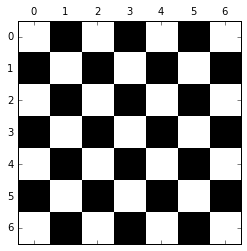

In [3]:
matshow(checkerboard)

In [4]:
#whats the dtype?
checkerboard.dtype

dtype('bool')

In [5]:
#create a PIL image with binary mode
cb_img = Image.fromarray(checkerboard,mode='1')

In [6]:
#write the image
cb_img.save('cb_img.bmp')

Here's the image, admittedly its small:
!['cb_img.bmp'](cb_img.bmp)
but you can see there's no white!

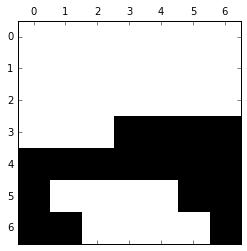

In [7]:
#read in the image
cb_img_read = Image.open('cb_img.bmp')

#convert to array
checkerboard_read = np.asarray(cb_img_read)

#display 
matshow(checkerboard_read)

In [8]:
cb_img2 = Image.fromarray((checkerboard*255).astype('uint8'),mode='L')

#write the image
cb_img2.convert('1').save('cb_img2.bmp')

Here's the new image:
!['cb_img2.bmp'](cb_img2.bmp)
Now its a checkerboard!

In [23]:
a = array([True, False])

In [29]:
(a*255).dtype

dtype('int32')

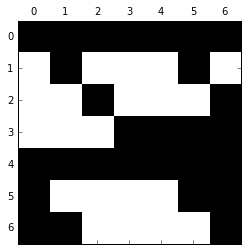

In [9]:
#read in the image
cb_img2_read = Image.open('cb_img2.bmp')

#convert to array
checkerboard2_read = np.asarray(cb_img2_read)

#display 
matshow(checkerboard2_read)

To write a binary file you first need to convert binary data to `uint8` datatype and cast to that data type as well.

Then you need to convert using the `Image.convert(mode)` method to binary before saving.

In [10]:
checkerboard2_read.dtype

dtype('bool')

In [ ]:
cb_img2.save()

# Writing direct to zipfiles

In [11]:
import zipfile as zp

In [20]:
# this is admittedly not the most transferable
with zp.ZipFile("junk.zip","w") as zf:
    # generate an output byte buffer to save the data in, instead of a file
    output = BytesIO()
    # convert and save the image to the byte buffer with the correct format
    cb_img2.convert('1').save(output, "BMP")
    # wrtie the byte buffer to the zipfile directly
    zf.writestr("junk.bmp", output.getvalue())